>   Vamos usar o algoritmo K-Means para criar clusters em cada dataset.


>   Bibliotecas

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


>   Carregar os dados dos arquivos CSV

In [4]:
stress_factors = pd.read_csv('/home/rhudson/Documentos/PUC/Projeto em ciência de dados I/ppl-cd-pcd-sist-int-2024-1-sleepresearch-2024-1/assets/data/Student Stress Factors.csv')
performance = pd.read_csv('/home/rhudson/Documentos/PUC/Projeto em ciência de dados I/ppl-cd-pcd-sist-int-2024-1-sleepresearch-2024-1/assets/data/Student_Performance.csv')
# Verificar os cabeçalhos dos datasets para garantir a correspondência correta
print(stress_factors.columns)
print(performance.columns)

Index(['Sleep Quality', 'suffer headaches', 'academic performance',
       'study load', 'practice extracurricular activities', 'stress levels'],
      dtype='object')
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


>   Clusterização do Dataset de Stress Factors

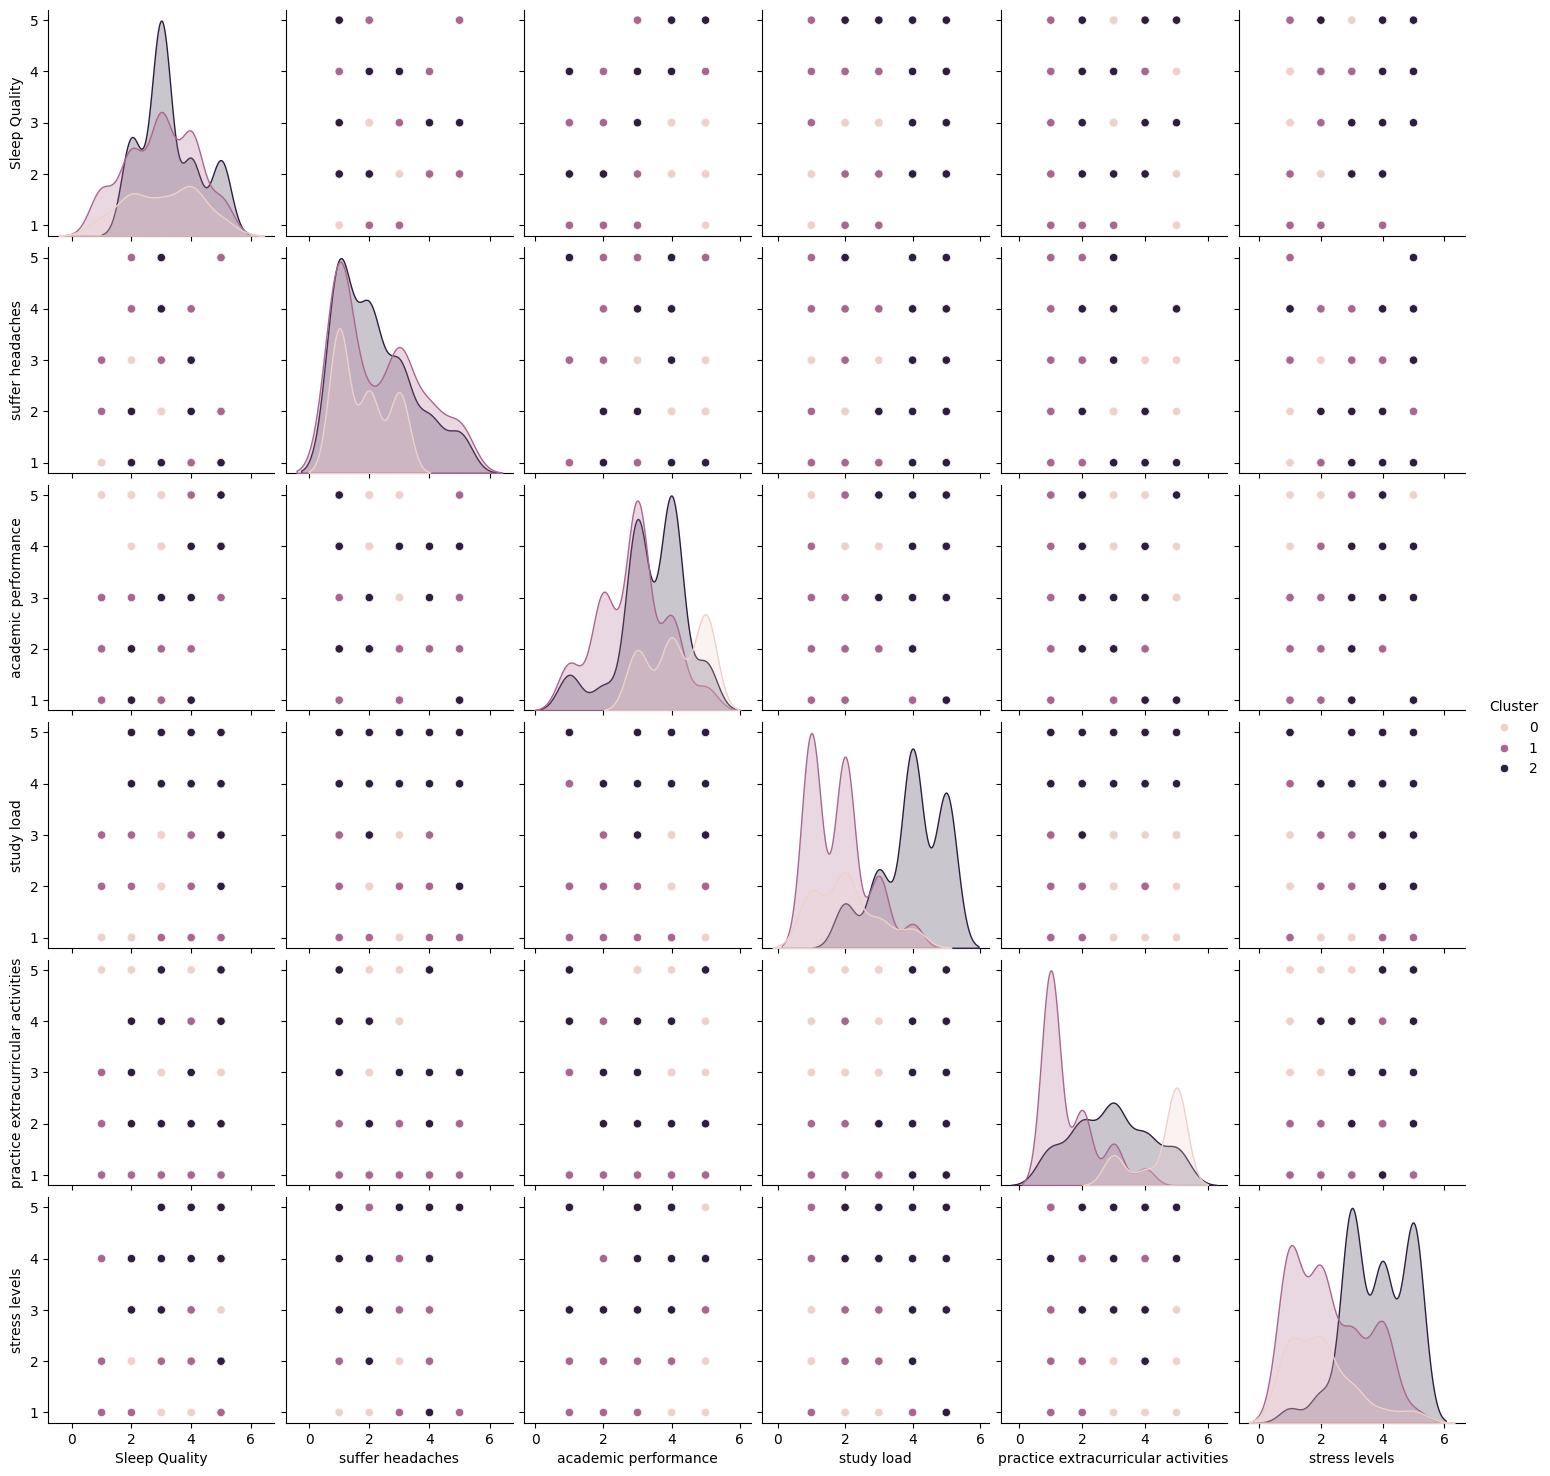

In [5]:
# Pré-processamento do dataset de stress factors
X_stress = stress_factors.dropna()  # Remover valores faltantes
scaler_stress = StandardScaler()
X_stress_scaled = scaler_stress.fit_transform(X_stress)

# Usar K-Means para clustering
kmeans_stress = KMeans(n_clusters=3, random_state=1)
stress_clusters = kmeans_stress.fit_predict(X_stress_scaled)

# Adicionar os clusters ao dataframe
stress_factors['Cluster'] = stress_clusters

# Visualizar os clusters
sns.pairplot(stress_factors, hue='Cluster')
plt.show()

>   Clusterização do Dataset de Performance


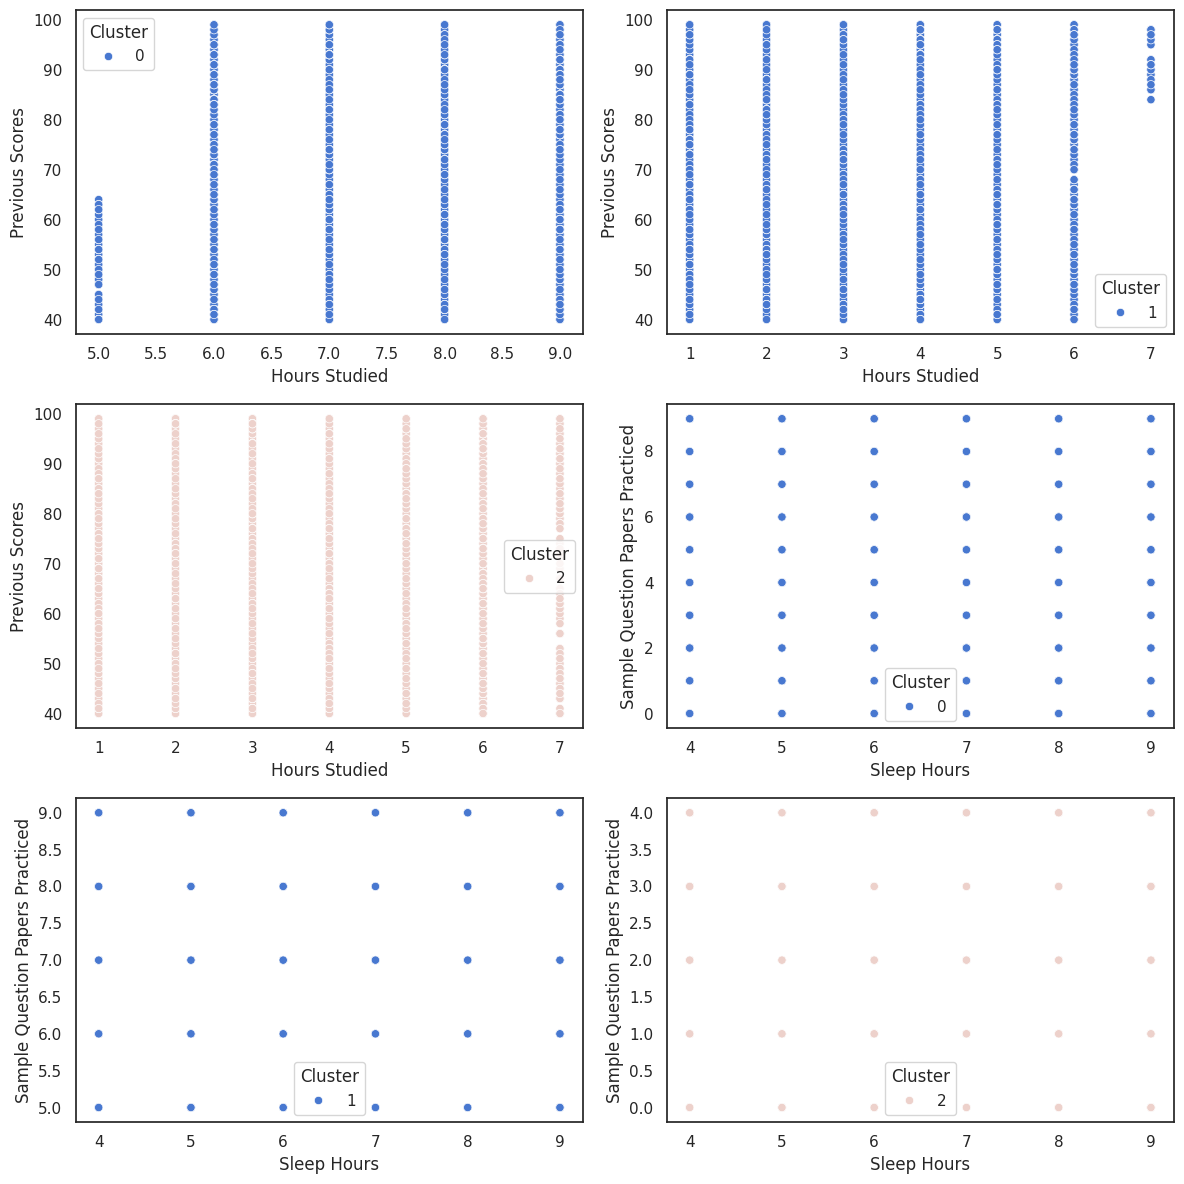

In [8]:
# (código para ler e combinar os dados em df_performance)
# Converter a coluna 'Extracurricular Activities' para numérica
performance['Extracurricular Activities'] = performance['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Pré-processamento dos dados (remover valores faltantes e padronizar)
X_performance = performance.drop(columns=['Extracurricular Activities', 'Performance Index']).dropna()
scaler_performance = StandardScaler()
X_performance_scaled = scaler_performance.fit_transform(X_performance)

# Aplicar K-Means para clustering
kmeans_performance = KMeans(n_clusters=3, random_state=1)
performance_clusters = kmeans_performance.fit_predict(X_performance_scaled)

# Adicionar os clusters ao DataFrame original
performance['Cluster'] = performance_clusters

# Separar os dados por cluster
cluster_0 = performance[performance['Cluster'] == 0]
cluster_1 = performance[performance['Cluster'] == 1]
cluster_2 = performance[performance['Cluster'] == 2]

# Plotar gráficos de dispersão para cada par de variáveis
sns.set(style="white", palette="muted")
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.scatterplot(data=cluster_0, x='Hours Studied', y='Previous Scores', hue='Cluster', ax=axs[0, 0])
sns.scatterplot(data=cluster_1, x='Hours Studied', y='Previous Scores', hue='Cluster', ax=axs[0, 1])
sns.scatterplot(data=cluster_2, x='Hours Studied', y='Previous Scores', hue='Cluster', ax=axs[1, 0])
sns.scatterplot(data=cluster_0, x='Sleep Hours', y='Sample Question Papers Practiced', hue='Cluster', ax=axs[1, 1])
sns.scatterplot(data=cluster_1, x='Sleep Hours', y='Sample Question Papers Practiced', hue='Cluster', ax=axs[2, 0])
sns.scatterplot(data=cluster_2, x='Sleep Hours', y='Sample Question Papers Practiced', hue='Cluster', ax=axs[2, 1])

plt.tight_layout()
plt.show()

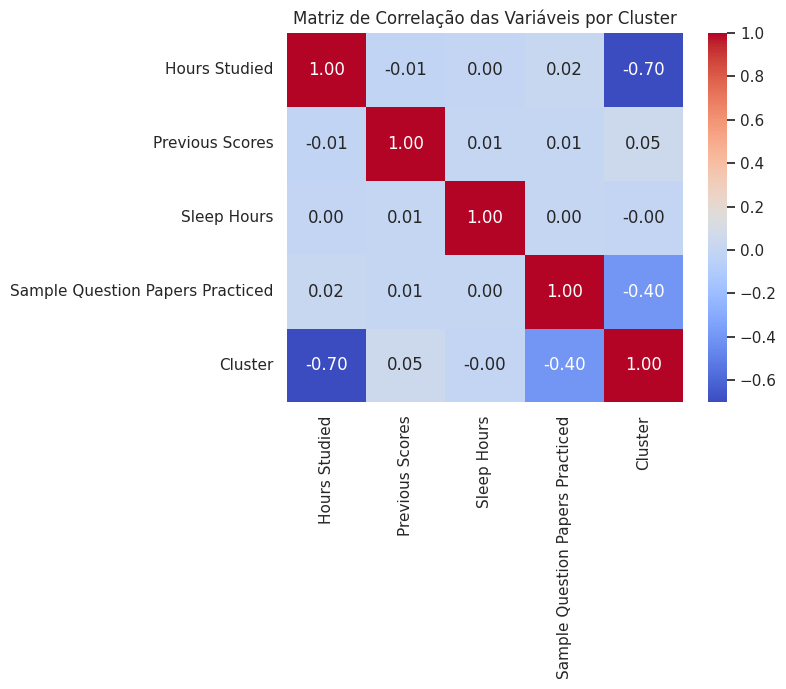

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = performance[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Cluster']].corr()

# Plotar heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis por Cluster')
plt.show()

>   Análise das Relações Entre Clusters
    - Agora que temos clusters para ambos os datasets, vamos analisar as relações entre eles.

   Stress Cluster  Performance Cluster
0             2.0                    2
1             1.0                    2
2             1.0                    0
3             1.0                    2
4             2.0                    0


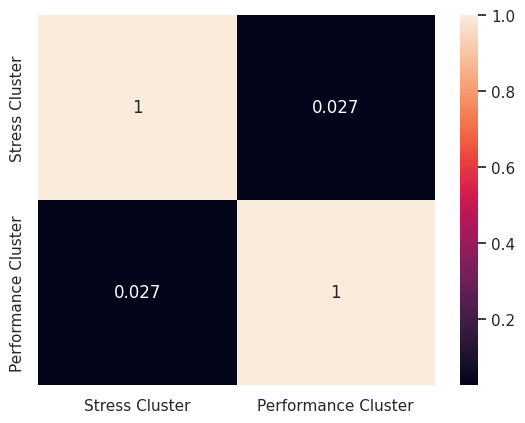

In [9]:
# Vamos combinar os resultados dos clusters
# Supondo que temos o mesmo número de linhas e os dados são na mesma ordem
combined_df = pd.DataFrame({
    'Stress Cluster': stress_factors['Cluster'],
    'Performance Cluster': performance['Cluster']
})

# Verificar a combinação
print(combined_df.head())

# Analisar a correlação entre os clusters
correlation_matrix = combined_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()